In [5]:
# STEP 1: Setup


In [6]:

# Python ≥3.5 is required
import sys

# Scikit-Learn ≥0.20 is required
import sklearn

# Common imports
import numpy as np
import os

# data visualization
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [7]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Assignment_3"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [8]:
# STEP 2 & 3:  Get the data & Data Manpulation and Analysis using Pandas framework
import pandas as pd
from zipfile import ZipFile

#  zip_file = ZipFile(r"https://raw.githubusercontent.com/aiforsec/RIT-DSCI-633-FDS/main/Assignments/titanic.zip","r")

# df = pd.read_csv('https://raw.githubusercontent.com/aiforsec/RIT-DSCI-633-FDS/main/Assignments/titanic.zip', compression='zip', header=1, sep=',', quotechar='"')


# train_titanic = pd.read_csv(r'D:\AK\MS\RIT\FND of Dta Sci - Python\HW3\Dataset\titanic\train.csv')
# test_titanic = pd.read_csv(r'D:\AK\MS\RIT\FND of Dta Sci - Python\HW3\Dataset\titanic\train.csv')
train_titanic = pd.read_csv('https://raw.githubusercontent.com/kiniamit/RIT-DSCI-633-FDS/main/train.csv')
test_titanic = pd.read_csv('https://raw.githubusercontent.com/kiniamit/RIT-DSCI-633-FDS/main/test.csv')

train_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Saving figure attribute_histogram_plots


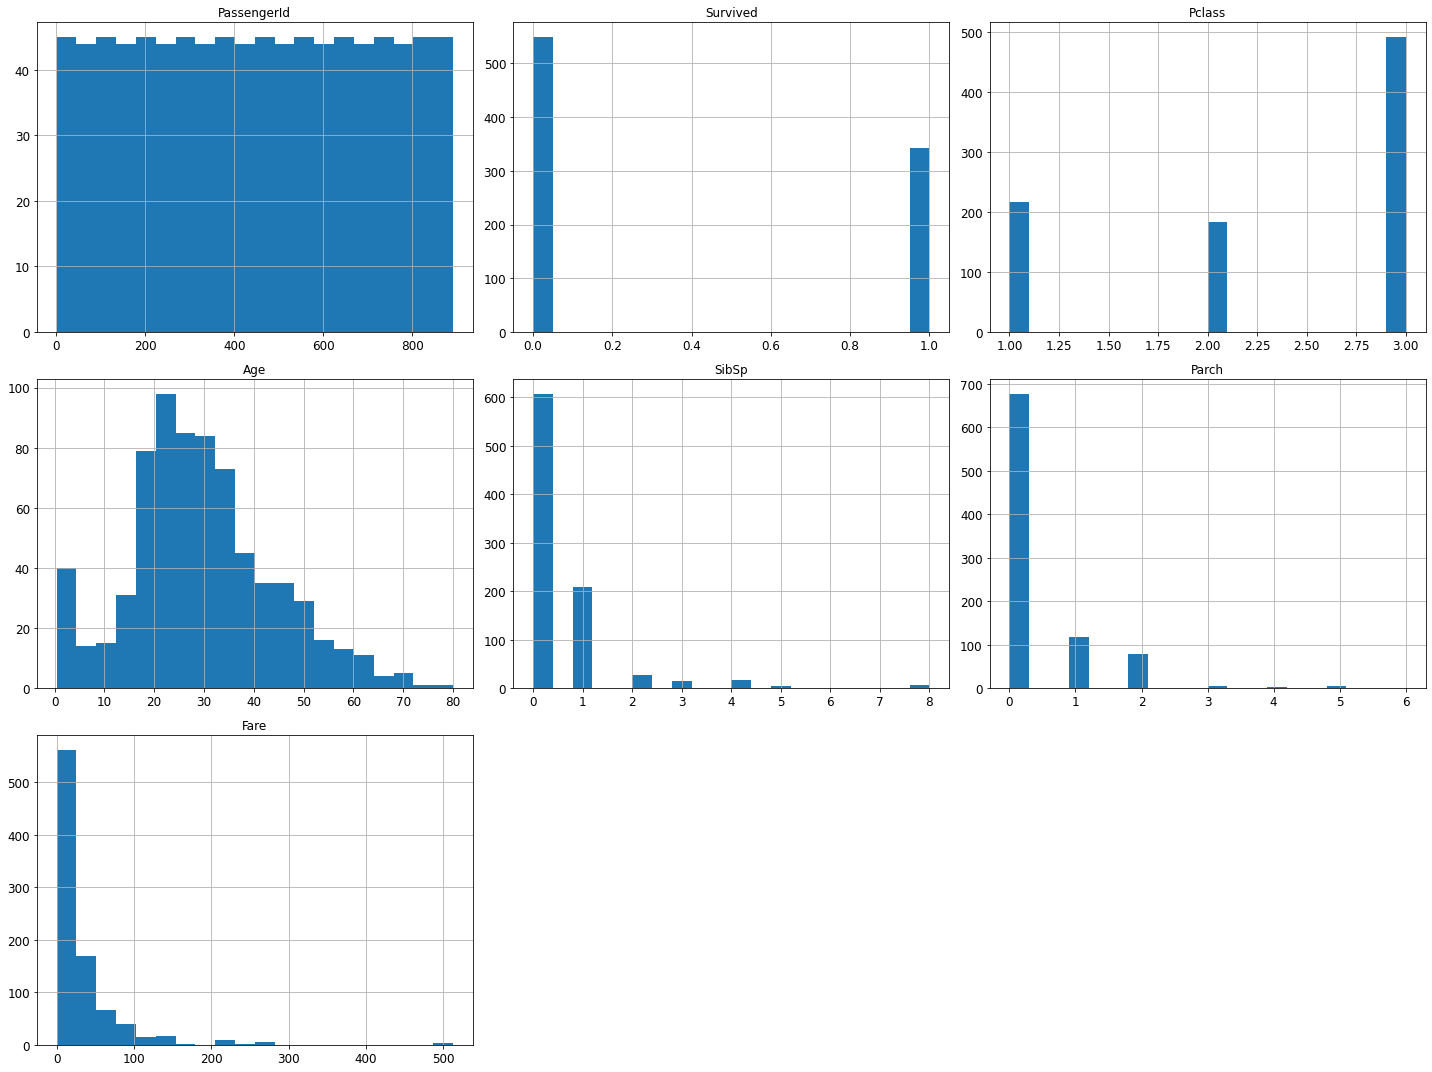

In [11]:
train_titanic.hist(bins=20, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [12]:
# Passenger id as seen in histograms and dta frame info is unique to every row and hence may not be helpful in analysis
# Above histograms and datafrmae summary show that age has high distinct values and Pclass has low unique value


Saving figure age_histogram_plots


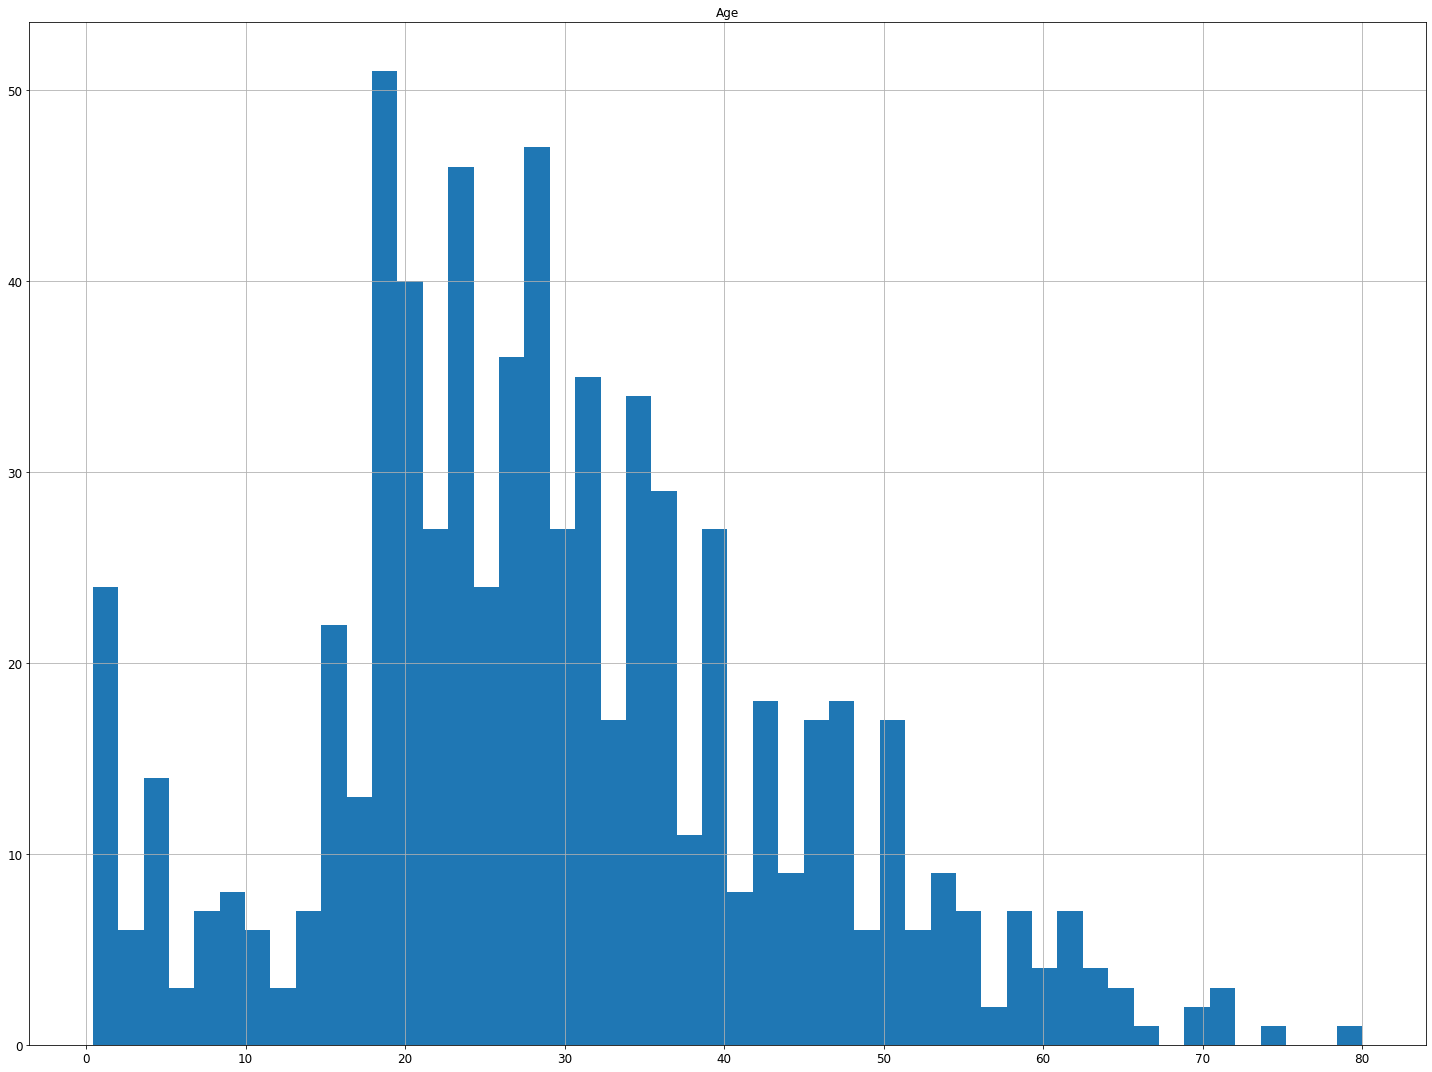

In [13]:
train_titanic.hist(column='Age',bins=50, figsize=(20,15))
save_fig("age_histogram_plots")
plt.show()

C:\Users\amitk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


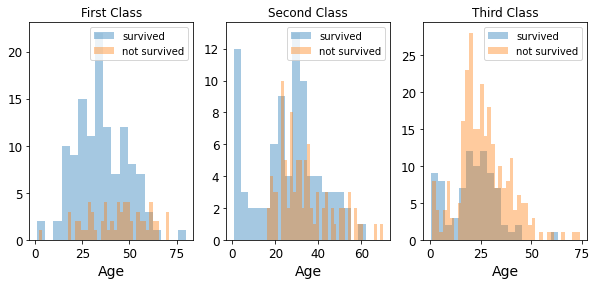

In [14]:
# STEP 4: Discover and visualize the data to gain insights
# Plot how many passengers survived by class and age

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10, 4))
class1 = train_titanic[train_titanic['Pclass']==1]
class2 = train_titanic[train_titanic['Pclass']==2]
class3 = train_titanic[train_titanic['Pclass']==3]
ax = sns.distplot(class1[class1['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(class1[class1['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('First Class')
ax = sns.distplot(class2[class2['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(class2[class2['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Second Class')
ax = sns.distplot(class3[class3['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[2], kde = False)
ax = sns.distplot(class3[class3['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[2], kde = False)
ax.legend()
_ = ax.set_title('Third Class')

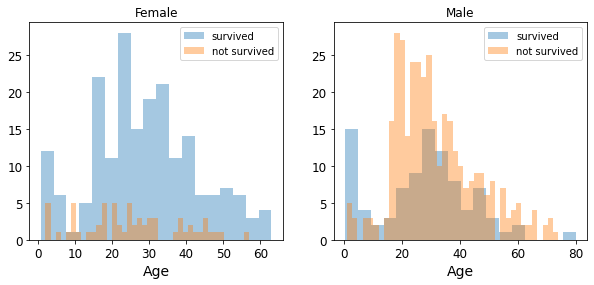

In [15]:
# Plot how many passengers survived by gender and age
# Outputs show females from age 15 to 35 have higher chance of survival
# Outputs show males from age 18 to 30 have higher chance of survival

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_titanic[train_titanic['Sex']=='female']
men = train_titanic[train_titanic['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

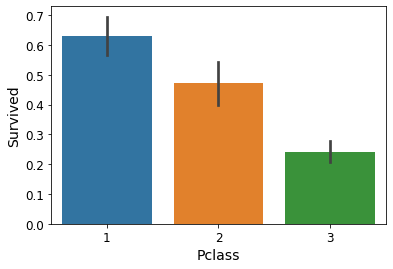

In [16]:
sns.barplot(x='Pclass', y='Survived', data=train_titanic)

# the below output shows first class passengers have higher chances of survival

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

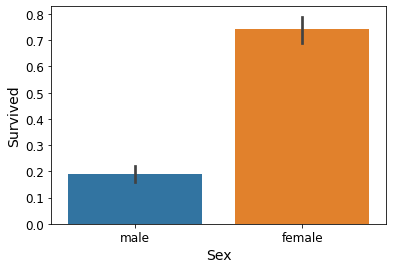

In [17]:
sns.barplot(x='Sex', y='Survived', data=train_titanic)
# the below output shows female passengers have higher chances of survival

In [18]:
# STEP 5 Prepare the data for Machine Learning algorithms
# drop passengerid is it has unique value for each row and is not useful
train_titanic = train_titanic.drop(['PassengerId'], axis=1)

In [19]:
train_titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
# Populate missing values of age with values based on mean and std dev 
data = [train_titanic, test_titanic]

for dataset in data:
    mean = train_titanic["Age"].mean()
    std = test_titanic["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_titanic["Age"].astype(int)
    
train_titanic["Age"].isnull().sum()

0

In [21]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 73.2+ KB


In [22]:
train_titanic['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [23]:
# Populate missing values in Embarked with the most common value 'S' 
common_value='S'
data = [train_titanic, test_titanic]

for dataset in data:
    dataset['Embarked']=dataset['Embarked'].fillna(common_value)

In [24]:
train_titanic['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [25]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 73.2+ KB


In [26]:
data = [train_titanic, test_titanic]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [27]:
# Blank line

In [28]:
# Add title and drop name from data
data = [train_titanic, test_titanic]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

train_titanic = train_titanic.drop(['Name'], axis=1)
test_titanic = test_titanic.drop(['Name'], axis=1)

In [29]:
# Convery gender to int type using mapping
genders = {"male": 0, "female": 1}
data = [train_titanic, test_titanic]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [30]:
train_titanic['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [31]:
# drop ticket
train_titanic = train_titanic.drop(['Ticket'], axis=1)
test_titanic = test_titanic.drop(['Ticket'], axis=1)

In [32]:
# Convery Embarked to int type using mapping
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_titanic, test_titanic]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [33]:
train_titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22,1,0,7,NaN,0,1
1,1,1,1,38,1,0,71,C85,1,3
2,1,3,1,26,0,0,7,NaN,0,2
3,1,1,1,35,1,0,53,C123,0,3
4,0,3,0,35,0,0,8,NaN,0,1
5,0,3,0,30,0,0,8,NaN,2,1
6,0,1,0,54,0,0,51,E46,0,1
7,0,3,0,2,3,1,21,NaN,0,4
8,1,3,1,27,0,2,11,NaN,0,3
9,1,2,1,14,1,0,30,NaN,1,3


In [34]:
# Drop cabin as it has lot of nulls
train_titanic = train_titanic.drop(['Cabin'], axis=1)
test_titanic = test_titanic.drop(['Cabin'], axis=1)

In [35]:
# STEP 6: Select and train a model
X_train = train_titanic.drop("Survived", axis=1)
Y_train = train_titanic["Survived"]
X_test  = test_titanic.drop("PassengerId", axis=1).copy()

In [36]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB



sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print (acc_sgd)

71.6


-------------CROSS-VALIDATING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1609s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.3s finished


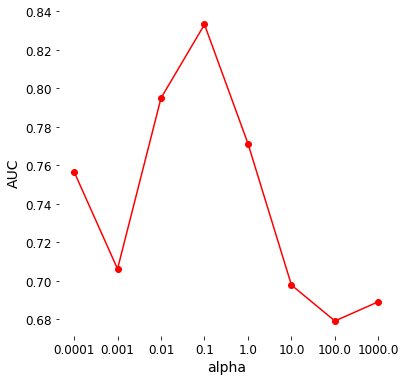

{'alpha': 0.1, 'loss': 'log', 'max_iter': 1000, 'n_jobs': -1, 'penalty': 'l2'} 0.8331608057154762


In [42]:
# STEP 7 Fine-tuning the model
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf
from scipy.stats import expon

grid = {
   'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    # 'alpha': expon.stats(scale=.1), # learning rate
    'max_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, paramGrid,
           X_train, Y_train, 
           metric = roc_auc_score,
           scoreLabel = "AUC")

print(bestModel,bestScore)

In [40]:
# Execute the model with the best params derived above

sgd = linear_model.SGDClassifier(alpha= 0.01, loss= 'log', max_iter= 1000, n_jobs= -1, penalty= 'l2')
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print (acc_sgd)

64.2
